# The Different Statistical Attributes and their Value in the Changing NBA

### Group Members: Neel Mirani, Natalie Treichel, Roger Chen, Hyungsuk, Phillipp Liu

## Table of Contents:
* [Introduction and Motivation](#first-bullet)
* [Data](#second-bullet)
* [Model](#third-bullet)
* [Results](#fourth-bullet) 
* [Conclusion](#fifth-bullet)
* [Sources Cited](#sixth-bullet)


In [2]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.stats.api as sms
from stargazer.stargazer import Stargazer
nba_data = pd.read_excel("NBA_Data_new.xlsx")

![image-2.png](attachment:image-2.png) <a class="anchor" id="first-bullet"></a>

# Introduction and Motivation

In professional sports, competition is fierce, both between and within teams. Teams battle each other for championship titles while within the teams players fight for a place in the starting lineup. The NBA is a great example of this internal fight for playing time. There has been a steady decrease in average playing time in the last decades due to factors such as expanded regular-season rosters from 12 to 15 players and coaches being more strategic with player rotation. That is why for this project, we want to see what factors in the NBA, a league heavily driven by statistics, affects how much playtime a player receives. We want to investigate the relationship between points, assists, and rebounding stats on minutes played per game (MIN/G). MIN/G  is an indicator of how valuable a player is to the team as more valuable players will be on the court for longer in order to give their team an advantage. It would be interesting to see which attributes are most valued in the NBA today (points vs assists vs rebounds). We will measure the partial effects of each independent variable in order to discover which one has the largest partial effects on MIN/G. This will indicate to us which attribute is most valuable in the NBA today. Our initial hypothesis is that points will have the largest partial effect because of the high-scoring nature of the NBA today. See the below graph to see the change towards more 3 point shooting. 


![image.png](attachment:image.png)

In [3]:
nba_data['FTP'] = nba_data['FTM']/nba_data['FTA']
cormat = nba_data[['MIN/G', "PTS", "AST", 'REB', 'STL', "BLK", 'TOV', 'FTP']]
cormat = cormat.iloc[1:]
cormat
cormat.corr().round(decimals=2)

,MIN/G,PTS,AST,REB,STL,BLK,TOV,FTP
MIN/G,1.00,0.70,0.46,0.35,0.33,0.15,0.58,0.11
PTS,0.70,1.00,0.52,0.31,0.23,0.10,0.77,0.22
AST,0.46,0.52,1.00,0.00,0.44,-0.21,0.78,0.16
REB,0.35,0.31,0.00,1.00,0.06,0.64,0.29,-0.38
STL,0.33,0.23,0.44,0.06,1.00,0.07,0.38,-0.03
BLK,0.15,0.10,-0.21,0.64,0.07,1.00,0.02,-0.28
TOV,0.58,0.77,0.78,0.29,0.38,0.02,1.00,0.05
FTP,0.11,0.22,0.16,-0.38,-0.03,-0.28,0.05,1.00


This correlation table shows to us that there is no perfect collinearity between the explanatory variables, yet at the same time, each explanatory variable is correlated with the dependent variable: MIN/G. This satisfies condition 3 of OLS (no perfect multicollinearity) while also justifying the explanatory variables being included in the regression.

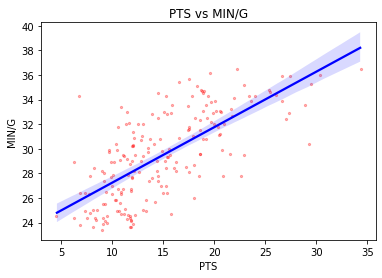

In [12]:
sns.regplot(x= "PTS", y= "MIN/G", data=cormat, line_kws= {'color':'blue'}, marker='o',
           scatter_kws={'color':'red', 's':5, 'alpha':0.3}, x_jitter = 0.2).set(title= 'PTS vs MIN/G',
                                                  xlabel="PTS", ylabel = "MIN/G");

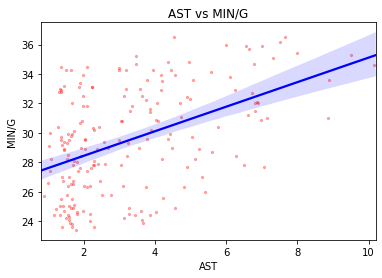

In [13]:
sns.regplot(x= "AST", y= "MIN/G", data=cormat, line_kws= {'color':'blue'}, marker='o',
           scatter_kws={'color':'red', 's':5, 'alpha':0.3}, x_jitter = 0.2).set(title= 'AST vs MIN/G',
                                                  xlabel="AST", ylabel = "MIN/G");

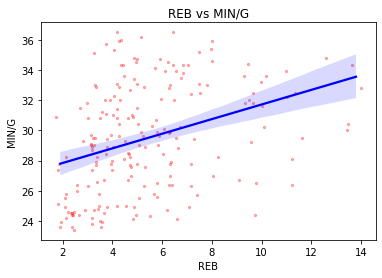

In [14]:
sns.regplot(x= "REB", y= "MIN/G", data=cormat, line_kws= {'color':'blue'}, marker='o',
           scatter_kws={'color':'red', 's':5, 'alpha':0.3}, x_jitter = 0.2).set(title= 'REB vs MIN/G',
                                                  xlabel="REB", ylabel = "MIN/G");

These graphs give us the initial impression that points, assists, and rebounds all have a positive correlation with minutes played per game. We will conduct several regression models later in order to see whether they are statistically significant.

In [7]:
nba_data.groupby("Pos").agg({'PTS': 'mean', 'AST': 'mean', 'REB': 'mean', 'STL': 'mean', 'REB': 'mean', 'FTP': 'mean', 'BLK': 'mean', 'MIN/G': 'mean'})

,PTS,AST,REB,STL,FTP,BLK,MIN/G
Pos,,,,,,,
C,14.933333,2.436111,9.038889,0.783333,0.724648,1.222222,29.402778
PF,14.912821,2.674359,6.261538,0.869231,0.765084,0.694872,30.002564
PG,16.149153,4.952542,3.961017,1.054237,0.811040,0.306780,29.530508
SF,14.010526,2.434211,4.507895,1.047368,0.796654,0.400000,29.457895
SG,14.378571,2.764286,3.617857,0.846429,0.795588,0.300000,29.039286


This table gives us the average statistic by position played in the NBA. It gives us the impression that certain positions perform differently relative to each statistical attribute. However, it is clear they all play a similar number of minutes. This is itneresting to see before we create our regression models.

# Data <a class="anchor" id="second-bullet"></a>

We will be using data from the lineups.com that summarizes the impact of each active player in the NBA throughout the 2019-2020 season by averaging their game stats (points per game, assists, rebounds etc.) and their average MIN/G. MIN/G represents the average minutes the specific player was on the court for all games he was available to play.

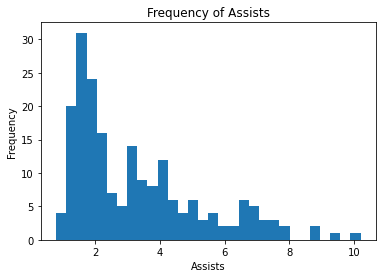

In [3]:
plt.hist(nba_data['AST'], density = False, bins=30)  # density=False would make counts

plt.title('Frequency of Assists')
plt.ylabel('Frequency')
plt.xlabel('Assists');


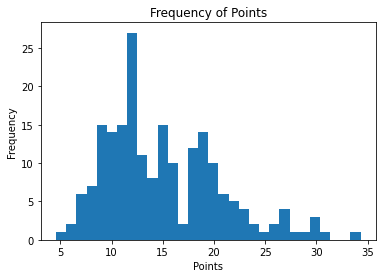

In [4]:
plt.hist(nba_data['PTS'], density = False, bins=30)  # density=False would make counts

plt.title('Frequency of Points')
plt.ylabel('Frequency')
plt.xlabel('Points');

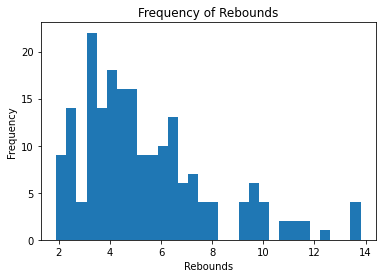

In [5]:
plt.hist(nba_data['REB'], density = False, bins=30)  # density=False would make counts

plt.title('Frequency of Rebounds')
plt.ylabel('Frequency')
plt.xlabel('Rebounds');

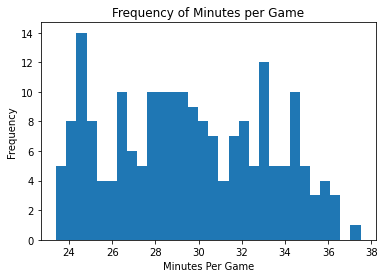

In [6]:
plt.hist(nba_data['MIN/G'], density = False, bins=30)  # density=False would make counts

plt.title('Frequency of Minutes per Game')
plt.ylabel('Frequency')
plt.xlabel('Minutes Per Game');

The graphs above demonstrate the distribution of the variables points, rebounds, and minutes played per game. We created this graph in order to see if there was variation in the independent variables and variation in the dependent variables. From this graph, we can tell there is. If this wasn't the case, an OLS condition would be violated.

# Methodology/Empircal Model <a class="anchor" id="third-bullet"></a>

$Model 1 = minutespergame = \beta_0 + \beta_1 log(assists) + \beta_2 log(rebounds) + \beta_3 log(points) + u$

$Model 2 = minutespergame = \beta_0 + \beta_1 log(assists) + \beta_2 log(rebounds) + \beta_3 log(points) + \beta_4 PPC + u$

$Model 3 = minutespergame = \beta_0 + \beta_1 log(assists) + \beta_2 log(rebounds) + \beta_3 log(points) + \beta_4 PPC + \beta_5 BLKB + \beta_6 STLB + u$

We are going to explore what variables in NBA games affect players' playing time per game by using Multiple Linear Regression. We put minutes per game as a dependent variable and chose the number of assists, rebounds, and scores as independent variables that could affect the dependent variable. We used the log form for independent variables because we would like to see how the percentage change of each independent variable affects minutes per game.

Based on the correlation table of each independent variable and dependent variable we prepared above, the number of point per game is expected to have the greatest impact on the dependent variable, minituespergame. And when analyzing each variable for each position, most of the variables had little deviation by positions, while rebound had a large deviation. This seems to be because the rebound is to catch the ball that bounced after the shooting failure, so the closer the position to the goal, the more chances there are to rebound.

# Results <a class="anchor" id="fourth-bullet"></a>



In [10]:
nba_data['min'] = nba_data['MIN/G']
nba_data['3PP'] = nba_data['3PM']/nba_data['3PA']
cuts = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
nba_data['PPC'] = pd.cut(nba_data['3PP'], bins = cuts)
nba_data['BLKB'] = nba_data['BLK'] > np.mean(nba_data['BLK'])
nba_data['STLB'] = nba_data['STL'] > np.mean(nba_data['STL'])
m1 = smf.ols('min ~ np.log(PTS) + np.log(AST) + np.log(REB) + np.log(TOV) + np.log(FTP)', data = nba_data).fit()
m2 = smf.ols('min ~ np.log(PTS) + np.log(AST) + np.log(REB) + np.log(TOV) + np.log(FTP) + PPC', data = nba_data).fit() 
m3 = smf.ols('min ~ np.log(PTS) + np.log(AST) + np.log(REB) + np.log(TOV) + np.log(FTP) + PPC + BLKB + STLB' , data = nba_data).fit() 
st = Stargazer([m1, m2, m3])
from IPython.core.display import HTML
HTML(st.render_html())

Based on our results, in model 1, assists, points, and rebounds are all statistically significant at the 1% level. Free throw percentage and turnovers are not statistically significant in model 1. In model 2, assists, points, and rebounds are significant, but free throw percentage and turnovers are not. Additionally, in model 2, the three point success percentage (PPC) being between 20-30% is statistically significant at the 10% level; PPC between 30-40% is statistically significant at the 5% level; and 40-50% and 50-60% groups are not statistically significant, which is llikely because not enough players can obtain this high of a success rate. In mdoel 3, everything that was statisticaly significant in model 2 remains that way. However, we add on blocks, which is not statistically significant, and steals which is at the 5% level.  

As we expected, points has the largest impact on minutes played per game in all 3 models. In model 1, a 1% increase in points scored per game leads to an increase in minutes played per game of .0534 minutes. Model 2 and model 3 have similar coefficients. For the models, the statistically significant variavble with the smallest impact on minutes played per game is assists, which for a 1% increase, only increases minutes played per game by .01479 in model 2, with similar impacts for models 1 and 3. In model 3, steals is also significant, and we created a dummy variable that is equal to 1 if the player records more steals that acerage and 0 otherwise. When a player records more steals than average he will increase his minutes played per gmae by an average of .812 minutes. In our creation of PPC, we made a categorial variable into groups based on whether the player's three point success percentage was between 10-20%, 20-30%, 30-40%, 40-50%, or 50-60%. For the 30-40% category, for example, they play, on average, 2.542 more minutes per game than the 10-20% category. 

### Testing for Heteroskedasticity

In [9]:
from statsmodels.compat import lzip
test1 = sms.het_breuschpagan(m1.resid, m1.model.exog)
name = ['Lagrange multiplier statisfgf556tic', 'p-value',
        'f-value', 'f p-value']
test2 = sms.het_breuschpagan(m2.resid, m2.model.exog)
name = ['Lagrange multiplier statisfgf556tic', 'p-value',
        'f-value', 'f p-value']
test3 = sms.het_breuschpagan(m3.resid, m3.model.exog)
name = ['Lagrange multiplier statisfgf556tic', 'p-value',
        'f-value', 'f p-value']
pd.DataFrame(lzip(name,test1, test2, test3))

,0,1,2,3
0,Lagrange multiplier statisfgf556tic,2.218012,5.965339,8.504653
1,p-value,0.818230,0.743382,0.667511
2,f-value,0.435120,0.647961,0.757925
3,f p-value,0.823698,0.754801,0.681458


# Conclusion <a class="anchor" id="fifth-bullet"></a>

Through this project, we confirmed that our initial regression model is valid that independent variables such as assists/G, rebounds/G, and points/G have a positive effect on the players' playing time per game in minutes. For a more precise regression model, we built a second regression model that added three-point shot success rates to the first regression model and a third regression model that added the number of blocks and stills as binary variables (variable = 1 if the number of blocks and stills is above average).

The R-squared values are increased as variables were added. Therefore, we could interpret the model, which including the success rate of three-point shots, the number of blocks, and the number of steals, better explains the dependent variable(players' playing time per game).

Among the independent variables, the variable 'points' had the largest impact on the players' playing time, and rebound and three-point success rates had the next biggest impact.

But in the case of the independent variable 'blocking', it has been shown to have a negative effect on a player's playing time, contrary to our expectations. However, the effect of the independent variable 'blocking' on the dependent variable was not statistically significant, so no conclusion could be made about it.

# Sources cited <a class="anchor" id="sixth-bullet"></a>
Azar, Mike. “The Slow Decline of NBA Stat Leaders.” Chart-It, Chart-It - Http://Mikerazar.com/Chart-It, 3 Feb. 2018, mikerazar.com/chart-it/2018/02/03/nba-stat-leaders/. 

“Players Traditional.” NBA Stats, www.nba.com/stats/players/traditional/?sort=PTS&amp;dir=-1. 

Zwerling, Jared. “In Today's NBA, Even the Stars Play Less, and for Good Reason-Here's Why.” Bleacher Report, Bleacher Report, 3 Oct. 2017, bleacherreport.com/articles/1815776-in-todays-nba-even-the-stars-play-less-and-for-good-reason-heres-why.